# Convolutional neural network
This part will show the code of the convolutional network 

In [4]:
##from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#!pip install pillow
#!pip install pydicom


In [6]:
#!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import pydicom
import os

In [8]:
def get_names(path):
    names = []
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            _, ext = os.path.splitext(filename)
            if ext in ['.dcm']:
                names.append(filename)
    
    return names

In [9]:
def convert_dcm_jpg(name):
    
    im = pydicom.dcmread('/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134/'+name)

    im = im.pixel_array.astype(float)

    rescaled_image = (np.maximum(im,0)/im.max())*255 # float pixels
    final_image = np.uint8(rescaled_image) # integers pixels

    final_image = Image.fromarray(final_image)

    return final_image

In [10]:
names = get_names('/home/alejandrodf1/Documents/theory_project/manifest-1592488683281/C4KC-KiTS/KiTS-00000/06-29-2003-NA-threephaseabdomen-41748/10.000000-late-10134')

In [11]:
len(names)

154

In [12]:
for name in names:
    image = convert_dcm_jpg(name)
    image.save(name+'.png')

In [13]:
dirr = '/content/drive/MyDrive/manifest-1592488683281/C4KC-KiTS/KiTS-00001/11-13-2003-NA-threephaseabdomen-49621/300.000000-Segmentation-44409/1-1.dcm'
ds = pydicom.dcmread(dirr)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/manifest-1592488683281/C4KC-KiTS/KiTS-00001/11-13-2003-NA-threephaseabdomen-49621/300.000000-Segmentation-44409/1-1.dcm'

In [ ]:
#!pip install pydicom
#!pip install opencv-python

In [ ]:
%load_ext autoreload
%autoreload 2

# Image processing

In [2]:
import os  #directory operations
import pandas as pd  #data nalysis
import numpy as np
import pydicom  #manage dicom files


In [8]:
data_dir = '/home/alejandrodf1/Documents/theory_project/teoria_project/data/raw/10.000000-late-10134/'
patients = os.listdir(data_dir)
print(patients)
#labels_df = pd.read_csv('/content/drive/MyDrive/manifest-1592488683281/clinical.csv', index_col=0)
#labels_df.head()

['1-129.dcm', '1-086.dcm', '1-026.dcm', '1-077.dcm', '1-046.dcm', '1-047.dcm', '1-072.dcm', '1-033.dcm', '1-012.dcm', '1-090.dcm', '1-076.dcm', '1-153.dcm', '1-041.dcm', '1-113.dcm', '1-054.dcm', '1-058.dcm', '1-010.dcm', '1-127.dcm', '1-099.dcm', '1-051.dcm', '1-075.dcm', '1-068.dcm', '1-130.dcm', '1-062.dcm', '1-009.dcm', '1-019.dcm', '1-008.dcm', '1-035.dcm', '1-057.dcm', '1-018.dcm', '1-065.dcm', '1-013.dcm', '1-004.dcm', '1-119.dcm', '1-043.dcm', '1-055.dcm', '1-079.dcm', '1-140.dcm', '1-142.dcm', '1-106.dcm', '1-144.dcm', '1-074.dcm', '1-005.dcm', '1-122.dcm', '1-148.dcm', '1-132.dcm', '1-070.dcm', '1-149.dcm', '1-125.dcm', '1-094.dcm', '1-044.dcm', '1-154.dcm', '1-128.dcm', '1-037.dcm', '1-111.dcm', '1-131.dcm', '1-088.dcm', '1-136.dcm', '1-103.dcm', '1-143.dcm', '1-067.dcm', '1-007.dcm', '1-032.dcm', '1-071.dcm', '1-114.dcm', '1-048.dcm', '1-063.dcm', '1-091.dcm', '1-039.dcm', '1-045.dcm', '1-089.dcm', '1-145.dcm', '1-120.dcm', '1-116.dcm', '1-093.dcm', '1-121.dcm', '1-014.dcm'

In [9]:
data_dir+patients[0]

'/home/alejandrodf1/Documents/theory_project/teoria_project/data/raw/10.000000-late-10134/1-129.dcm'

In [ ]:
#pydicom.read_file(data_dir+patients[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6919.4624.277256203444452620057789744727
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.

In [17]:
slices=[]
for patient in patients[::1]:
    #label = labels_df.get_value(patient, 'cancer')
    #print(patient)
    path = data_dir + patient
    #print(os.listdir(path))
    slices.append(pydicom.read_file(data_dir + patient))  #obtengo todas las imagenes dicom
    #print(slices[0].pixel_array.shape, len(slices))
    #slices =[pydicom.read_file(s) for s in path]
slices[5]


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6919.4624.149603987580220230716344412480
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.

In [16]:
slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
print(len(slices))
print(slices[0])    

154
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6919.4624.271523708228797966350404288080
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.

In [ ]:
len(slices)

154

In [ ]:
slices=[]
for patient in patients[:3]:
    #label = labels_df.get_value(patient, 'cancer')
    #print(patient)
    path = data_dir + patient
    #print(os.listdir(path))
    slices.append(pydicom.read_file(data_dir + patient))  #obtengo todas las imagenes dicom
    #slices =[pydicom.read_file(s) for s in path]
    print(slices[0].pixel_array.shape, len(slices))
len(slices)

(512, 512) 1
(512, 512) 2
(512, 512) 3


3

# Visualization

In [20]:
import matplotlib.pyplot as plt

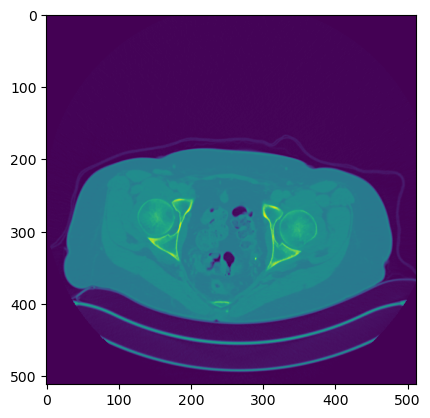

In [21]:
slices = []
for patient in patients[:1]:
    path = data_dir + patient
    slices.append(pydicom.read_file(data_dir + patient))
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    
    #          the first slice
    plt.imshow(slices[0].pixel_array)
    plt.show()

In [28]:
import cv2

In [24]:
IMG_PX_SIZE,IMG_PX_SIZE = 150
slices = []
for patient in patients[:1]:
    path = data_dir + patient
    slices.append(pydicom.read_file(data_dir + patient))
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))


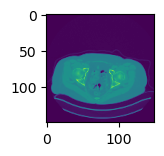

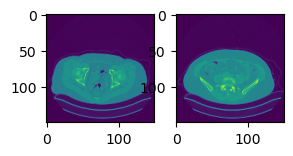

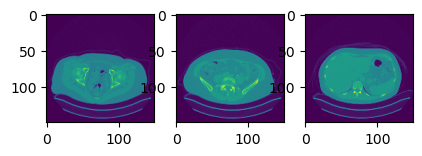

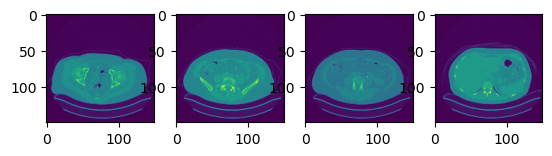

In [39]:
IMG_PX_SIZE= 150
slices = []
for patient in patients[:4]:
    path = data_dir + patient
    slices.append(pydicom.read_file(data_dir + patient))
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    fig = plt.figure()
    for num,each_slice in enumerate(slices[:12]):
        y = fig.add_subplot(3,4,num+1)
        new_img = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_img)
    plt.show()

In [49]:
import math

def chunks(l, n):
    # Credit: Ned Batchelder
    # Link: http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

IMG_PX_SIZE = 150
HM_SLICES = 20

#data_dir = '../input/sample_images/'
#patients = os.listdir(data_dir)
#labels_df = pd.read_csv('../input/stage1_labels.csv', index_col=0)
slices =[]
new_slices = []
for patient in patients[::1]:
    #try:
        #label = labels_df.get_value(patient, 'cancer')
        path = data_dir + patient
        slices.append(pydicom.read_file(data_dir + patient))
        #slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
        #new_slices = []
        slices = slices.append(cv2.resize(np.array(slices.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)))        
        chunk_sizes = math.ceil(len(slices) / HM_SLICES)
        for slice_chunk in chunks(slices, chunk_sizes):
            slice_chunk = list(map(mean, zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        print(len(slices), len(new_slices))
    #except:
        # some patients don't have labels, so we'll just pass on this for now
    #    pass


AttributeError: 'list' object has no attribute 'pixel_array'

In [ ]:
dataset.shape
dataset.tail(30)

NameError: name 'dataset' is not defined

In [ ]:
dirrec = '/datasets/data/metadata.csv'
data_reading = pd.read_csv(dirrec, index_col=0)
data_reading.head(5)


,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.2.276.0.7230010.3.1.3.0.74366.1588583084.764537,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,40,82 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:44:47.459
1.3.6.1.4.1.14519.5.2.1.6919.4624.313514201353787659031503464798,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,93,49,10 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:45:26.965
1.2.276.0.7230010.3.1.3.0.74416.1588583149.544409,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00001,1.3.6.1.4.1.14519.5.2.1.6919.4624.138299679445...,threephaseabdomen,11-13-2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,40,22 MB,.\C4KC-KiTS\KiTS-00001\11-13-2003-NA-threephas...,2022-06-28T15:46:01.505
1.3.6.1.4.1.14519.5.2.1.6919.4624.319956314021047038498210610134,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00000,1.3.6.1.4.1.14519.5.2.1.6919.4624.135173370342...,threephaseabdomen,06-29-2003,late,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,154,81,33 MB,.\C4KC-KiTS\KiTS-00000\06-29-2003-NA-threephas...,2022-06-28T15:47:15.449
1.3.6.1.4.1.14519.5.2.1.6919.4624.241474384128770482476403302453,C4KC-KiTS,NaN,https://doi.org/10.7937/TCIA.2019.IX49E8NX,KiTS-00001,1.3.6.1.4.1.14519.5.2.1.6919.4624.138299679445...,threephaseabdomen,11-13-2003,noncontrast,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,102,53,85 MB,.\C4KC-KiTS\KiTS-00001\11-13-2003-NA-threephas...,2022-06-28T15:48:48.813


In [ ]:
data_reading.dtypes

Series UID               object
Collection              float64
3rd Party Analysis       object
Data Description URI     object
Subject ID               object
Study UID                object
Study Description        object
Study Date               object
Series Description       object
Manufacturer             object
Modality                 object
SOP Class Name           object
SOP Class UID             int64
Number of Images          int64
File Size                object
File Location            object
Download Timestamp       object
dtype: object

In [ ]:
!pip install pydicom

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01.dcm'
ds = pydicom.dcmread(dirr)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6919.4624.302693755253199226108824913410
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.

In [ ]:
import matplotlib as plt
from matplotlib import pyplot


In [ ]:
pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

NameError: ignored

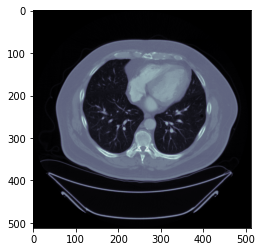

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-arterial.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

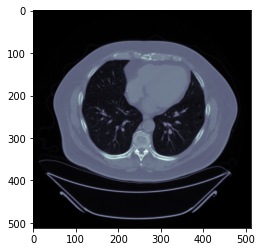

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-late.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

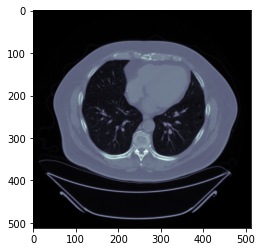

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-01-late.dcm'
ds = pydicom.dcmread(dirr)

pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

In [ ]:
dirr = '/work/kidney_proyect/data/raw/1-1.dcm'
ds = pydicom.dcmread(dirr)

image = np.reshape(ds,(1,512,512))
pyplot.imshow(ds.pixel_array,cmap=pyplot.cm.bone)
pyplot.show()

ValueError: cannot reshape array of size 1 into shape (1,512,512)

In [ ]:
#ite = datagen.flow_from_directory("Car Images", batch_size=1)
for i in range(9):

    # define subplot
    plt.subplot(330 + 1 + i)

    # generate batch of images
    batch = ds.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    image = np.reshape(256,256,3)

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplot'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=910d14ef-cedd-454b-aa64-d4ae003c9997' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>